In [2]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import scipy.signal
import re
import seaborn as sns
from scipy.interpolate import interp1d
from matplotlib.pyplot import cm
import copy
import sklearn.metrics as sm

def touch(fname):
    if os.path.exists(fname):
        os.utime(fname, None)
    else:
        os.mkdir(fname)

In [3]:
import sklearn

In [4]:
from lmfit import Model 
import lmfit

In [5]:
import lifefit as lf

In [6]:
import matplotlib.gridspec as gridspec

In [7]:
! pip install matplotlib-label-lines

In [8]:
from labellines import labelLines

In [9]:
def half_max(Y):
    return max(Y) / 2.
    
def find_nearest(array, value):
    
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#FWHM(df2.iloc[0]['spec'][0,:],df2.iloc[0]['spec'][1,:])
def fwhm_abs(spec,exind,cutoff_l,cutoff_h):
    spec_cut=spec['spec'][cutoff_l:cutoff_h,:]
    print(spec['file_name'])
    exind+=1
    max_ind=np.where(spec_cut[:,1]==np.amax(spec_cut[:,1]))[0][0]
    nearl=find_nearest(spec_cut[:max_ind,1],half_max(spec_cut[:,1]))
    nearr=find_nearest(spec_cut[max_ind:,1],half_max(spec_cut[:,1]))
    indl=np.where(spec_cut[:,1]==nearl)
    indr=np.where(spec_cut[:,1]==nearr)
    
    return indr[0][-1]-indl[0][0]

In [10]:
def ex(wl):
    ind=wl-385
    return int(ind)

def em(wl):
    ind=wl-400
    return int(ind)

def half_max(Y):
    return max(Y) / 2.
    
def find_nearest(array, value):
    
    idx = (np.abs(array - value)).argmin()
    return array[idx]

#FWHM(df2.iloc[0]['spec'][0,:],df2.iloc[0]['spec'][1,:])
def fwhm(spec):
    print(spec['file_name'])
    #exind+=1
    max_ind=np.where(spec['spec'][:,1]==np.amax(spec['spec'][:,1]))[0][0]
    nearl=find_nearest(spec['spec'][:max_ind,1],half_max(spec['spec'][:,1]))
    nearr=find_nearest(spec['spec'][max_ind:,1],half_max(spec['spec'][:,1]))
    indl=np.where(spec['spec'][:,1]==nearl)
    indr=np.where(spec['spec'][:,1]==nearr)
    
    return indr[0][-1]-indl[0][0]



In [11]:
def monoExp(x, m, t, b):
    return m * np.exp(-x/t) + b

def biExp(x, m1, t1, m2, t2, b):
    return m1 * np.exp(-x/t1) + m2 * np.exp(-x/t2) + b

In [12]:
def monoexp_dec_df(value,x):
  print(x.name)
  argmax=np.argmax(value[:,1])
  for n in range(1,4):
    if value[-n,1] >0.9*argmax:
      value[-n,1]=value[-(n+1),1]
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0]))
  yv=np.asarray(value[argmax:,1]/1000)
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv,p0,maxfev=100000)
  m, t, b = params
  print(t)
  return t

In [13]:
def monoexp_dec(spec,p,skip):
  argmax=skip+np.argmax(spec[:,1])
  #for n in range(1,4):
  #  if spec[-n,1] >0.9*argmax:
  #    spec[-n,1]=spec[-(n+1),1]
  #xv=np.asarray(spec[argmax:,0])
  xv=np.asarray((spec[argmax:,0]-spec[argmax-1,0]))
  yv=np.asarray(spec[argmax:,1])
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv,p,maxfev=500000)
  m, t, b = params
  print(m,t,b)
  return m,t,b

def biexp_dec(spec,p,skip):
  argmax=skip+np.argmax(spec[:,1])
  for n in range(1,4):
    if spec[-n,1] >0.9*argmax:
      spec[-n,1]=spec[-(n+1),1]
  xv=np.asarray((spec[argmax:,0]-spec[argmax-1,0]))
  yv=np.asarray(spec[argmax:,1])
  p0=(1.05,7,0.3)
  params, cv = scipy.optimize.curve_fit(biExp, xv, yv,p,maxfev=800000)
  m1, t1, m2, t2, b = params
  print(m1,t1,m2,t2,b)
  return m1,t1,m2,t2,b

In [14]:
filesPL=glob.glob("*.txt")
filesdictPL=dict.fromkeys(filesPL,1)

In [15]:
def import_raw(filesdict):
    for key in filesdict:
        print(key)
        if "LT" in key:
            tempdata=pd.read_csv(key,skiprows=9,header=None,sep=',')
            datarr=np.squeeze(np.array(tempdata))
            datarr=datarr[:,:-1]
            dataint=datarr.astype(float)
            filesdict[key]=dataint   
            dataint[:,1]*= (100000.0/dataint[:,1].max())
            filesdict[key]=dataint 
        else:
            tempdata=pd.read_csv(key,skiprows=21,header=None,sep=',')
            datarr=np.squeeze(np.array(tempdata))
            datarr=datarr[:,:-1]
            dataint=datarr.astype(float)
            filesdict[key]=dataint       
    return copy.deepcopy(filesdict)

In [16]:
folder='/Users/aaron/Documents/Uni/PhD/My_research/Data/Edinburgh/20230224/'
os.chdir(folder)
touch(folder+'/png')
filesPL=glob.glob("*.txt")
filesdictPL=dict.fromkeys(filesPL,1)

datadict=import_raw(filesdictPL)

pPD_10ul_25C_EM375.txt
mPD_LT450_EM460_IRF.txt
pPD_10ul_60C_LT375_EM590.txt
oPD_10ul_55C_EM450.txt
pPD_10ul_55C_LT375_EM590.txt
pPD_10ul_30C_LT375_EM590.txt
mPD_25ul_40C_EM450.txt
mPD_25ul_15C_EM450.txt
mPD_25ul_55C_LT450.txt
mPD_25ul_62C_LT450.txt
oPD_10ul_40C_LT450.txt
oPD_10ul_15C_LT450.txt
mPD_25ul_45C_EM450.txt
pPD_10ul_15C_LT375_EM590.txt
pPD_10ul_62.5C_LT375_EM590.txt
mPD_25ul_10C_EM450.txt
oPD_10ul_50C_EM450.txt
oPD_LT450_EM460_IRF.txt
oPD_10ul_45C_LT450.txt
oPD_10ul_10C_LT450.txt
mPD_25ul_50C_LT450.txt
pPD_10ul_45C_LT375_EM590.txt
pPD_10ul_20C_LT375_EM590.txt
pPD_10ul_20C_EM375.txt
pPD_10ul_25C_LT375_EM590.txt
mPD_25ul_10C_ex_dep.txt
pPD_10ul_40C_LT375_EM590.txt
pPD_10ul_10C_EM375.txt
pPD_10ul_45C_EM375.txt
mPD_25ul_60C_LT450.txt
oPD_10ul_62.5C_LT450.txt
mPD_25ul_35C_LT450.txt
pPD_10ul_10C_EM375_2.txt
pPD_10ul_10C_LT375_EM590.txt
oPD_10ul_20C_LT450.txt
oPD_10ul_60C_EM450.txt
oPD_10ul_35C_EM450.txt
mPD_25ul_20C_EM450.txt
pPD_10ul_35C_LT375_EM590.txt
oPD_10ul_25C_LT450.txt
mPD_2

In [17]:
checker3='(.*)_(.*)ul_(.*)C_(.*).txt'
df2=pd.DataFrame(index=None,columns=('CD','amount','temperature','measurement','file_name','spec'))
for key in datadict: 
  if re.search(checker3,key) is not None: 
    CD=np.str(re.search(checker3,key).group(1))
    amount=np.int(re.search(checker3,key).group(2))
    temperature=np.float(re.search(checker3,key).group(3))
    mes=re.search(checker3,key).group(4)
    if 'LT' in mes:
      mes='LT'
    else:
      mes='EM'
    #print(typ)
    dat=pd.DataFrame([[CD,amount,temperature,mes,key,filesdictPL[key]]]) 
    dat.columns=df2.columns 
    df2=df2.append(dat,ignore_index=True) 

In [18]:
df2['max']=df2.apply(lambda x: np.nanmax(x['spec'][1:,:]) if 'EM' in x.measurement else np.nan, axis=1)

In [19]:
df2['max_em']=df2.apply(lambda x: np.amin(x['spec'][:,0])+(np.where(x['spec'][:,1]==np.amax(x['spec'][:,1]))[0][0]) if 'EM' in x.measurement else np.nan, axis=1)

In [20]:
df2['FWHM']=df2.apply(lambda x: fwhm(x) if 'EM' in x.measurement else np.nan, axis=1)

pPD_10ul_25C_EM375.txt
oPD_10ul_55C_EM450.txt
mPD_25ul_40C_EM450.txt
mPD_25ul_15C_EM450.txt
mPD_25ul_45C_EM450.txt
mPD_25ul_10C_EM450.txt
oPD_10ul_50C_EM450.txt
pPD_10ul_20C_EM375.txt
mPD_25ul_10C_ex_dep.txt
pPD_10ul_10C_EM375.txt
pPD_10ul_45C_EM375.txt
pPD_10ul_10C_EM375_2.txt
oPD_10ul_60C_EM450.txt
oPD_10ul_35C_EM450.txt
mPD_25ul_20C_EM450.txt
mPD_25ul_25C_EM450.txt
oPD_10ul_30C_EM450.txt
pPD_10ul_15C_EM375.txt
pPD_10ul_40C_EM375.txt
pPD_10ul_30C_EM375.txt
pPD_10ul_62.5C_EM375.txt
mPD_25ul_62C_EM450.txt
mPD_25ul_55C_EM450.txt
oPD_10ul_15C_EM450.txt
oPD_10ul_40C_EM450.txt
oPD_10ul_10C_EM450.txt
oPD_10ul_45C_EM450.txt
mPD_25ul_50C_EM450.txt
pPD_10ul_60C_EM375.txt
pPD_10ul_35C_EM375.txt
pPD_10ul_50C_EM375.txt
mPD_25ul_35C_EM450.txt
mPD_25ul_60C_EM450.txt
oPD_10ul_62.5C_EM450.txt
oPD_10ul_20C_EM450.txt
oPD_10ul_25C_EM450.txt
mPD_25ul_30C_EM450.txt
pPD_10ul_55C_EM375.txt


In [22]:
oLT=df2.query('CD.str.contains("oPD").values & measurement.str.contains("LT").values').copy(deep=True)

In [23]:
oPL=df2.query('CD.str.contains("oPD").values & measurement.str.contains("EM").values').copy(deep=True)

In [22]:
def biexp_plot(spec2,p,name,skip,path):
  spec=spec2.copy()
  #spec[:,1]=spec[:,1]-np.average(spec[-5:,1])
  #spec[:,1] = np.where(spec[:,1] < 0.1, 0.1, spec[:,1])   
  spec[:,1]=spec[:,1]/10000
  
  argmax=np.argmax(spec[:,1])
  m1,t1,m2,t2,b=biexp_dec(spec,p,skip)
  plt.close()
  plt.figure(figsize=(6,5))
  plt.plot(spec[:,0],spec[:,1]) 
  plt.plot(spec[argmax+skip:,0], biExp(spec[:-argmax-skip,0], m1, t1, m2,t2,b), '--', label="fitted",linewidth=3.0) 
  plt.xlim(0,100)
  plt.yscale('log')
  print(m1,t1,m2,t2,b)
  plt.xlabel('Time (ns)')
  plt.ylabel("Photons")
  plt.tight_layout()
  plt.savefig("png/"+str(path)+str(name)+"_C.png",dpi=300,facecolor='white')
  return [np.round(100*m1/(m1+m2),decimals=1),np.round(t1,decimals=3),np.round(100*m2/(m1+m2),decimals=1),np.round(t2,decimals=3)]

In [29]:
def monoexp_plot(spec2,p,name,skip,path):
  spec=spec2.copy()
  #spec[:,1]=spec[:,1]-np.average(spec[-5:,1])
  #spec[:,1] = np.where(spec[:,1] < 0.1, 0.1, spec[:,1])   
  spec[:,1]=spec[:,1]/10000
  
  argmax=np.argmax(spec[:,1])
  m,t,b=monoexp_dec(spec,p,skip)
  plt.close()
  plt.figure(figsize=(6,5))
  plt.plot(spec[:,0],spec[:,1]) 
  plt.plot(spec[argmax+skip:,0], monoExp(spec[:-argmax-skip,0], m, t,b), '--', label="fitted",linewidth=3.0) 
  plt.xlim(0,100)
  plt.yscale('log')
  print(m,t,b)
  plt.xlabel('Time (ns)')
  plt.ylabel("Photons")
  plt.tight_layout()
  plt.savefig("png/"+str(path)+str(name)+"_C.png",dpi=300,facecolor='white')
  return [np.round(t,decimals=3)]

In [24]:
def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2)))

def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2)))

In [25]:
def _2gauss_plot(spec2,p,name,savename,start,end):
  spec=spec2.copy()
  x_array=np.asarray(spec[:,0])
  y_array=np.asarray(spec[:,1])
  popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, x_array, y_array, p,maxfev=100000)
  perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
  pars_1 = popt_2gauss[0:3]
  pars_2 = popt_2gauss[3:6]
  gauss_peak_1 = _1gaussian(x_array, *pars_1)
  gauss_peak_2 = _1gaussian(x_array, *pars_2)
  plt.close()
  fig = plt.figure(figsize=(6,4))
  ax1 = fig.add_subplot()

  ax1.plot(x_array, y_array, "black")
  ax1.plot(x_array, _2gaussian(x_array, *popt_2gauss), 'red')#,\
         #label="y= %0.2f$e^{%0.2fx}$ + %0.2f" % (popt_exponential[0], popt_exponential[1], popt_exponential[2]))

  # peak 1
  ax1.plot(x_array, gauss_peak_1, "g")
  ax1.fill_between(x_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
  
  # peak 2
  ax1.plot(x_array, gauss_peak_2, "y")
  ax1.fill_between(x_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  
  ax1.set_xlabel('Wavelength (nm)')
  ax1.set_ylabel('Intensity (a.u.)')
  ax1.set_xlim(start,end)
  ax1.set_ylim(0,1.2*max(y_array))
  fig.tight_layout()
  fig.savefig(savename+str(name)+"_C.png",dpi=300,facecolor='white')
  ret=np.append(pars_1,pars_2)
  return ret

In [26]:
def exp(x,A,B,C):
    return A*np.exp(B*x)+C

def ln(x,A,B,C,D):
    return A*np.log(B*x+C)+D

In [27]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 14,'font.weight':'normal'})

In [28]:
oLT_aug=pd.DataFrame(columns=['CD','amount','type','temp1','temp2','temperature','measurement','spec'])
for i in oLT.temperature.values:
    print(i)
    for diff in [5,10]:
        print(diff)
        if len(oLT.loc[oLT['temperature'] == i+diff])>0:
            dat1=oLT.loc[oLT['temperature'] == i+diff]
            dat2=oLT.loc[oLT['temperature'] == i]
            CD=dat1.CD.values[0]
            amount=dat1.amount.values[0]
            measurement=dat1.measurement.values[0]
            spec1=spec=copy.deepcopy(dat1.spec.values[0])
            spec2=spec=copy.deepcopy(dat2.spec.values[0])
            temp1=dat1.temperature.values[0]
            temp2=dat2.temperature.values[0]
            type='aug'
            for int in np.arange(1,abs(diff)):
                spec=spec1+(int/diff)*(spec2-spec1)
                maxv=max(spec[:,1])
                noisel=min(50,min(spec[:,1]))
                spec[:,1]=spec[:,1]+np.random.uniform(-0.5*noisel,0.5*noisel,len(spec[:,1]))
                for l in range(len(spec[:,1])):
                    spec[l,1]=spec[l,1]+np.random.uniform(-0.01*spec[l,1],0.01*spec[l,1])
                spec[:,1]=spec[:,1]*maxv/max(spec[:,1])
                temp=temp1+(int/diff)*(temp2-temp1)
                print(temp1,temp2,temp)
                dat=pd.DataFrame([[CD,amount,type,temp1,temp2,temp,measurement,spec]])
                dat.columns=oLT_aug.columns 
                oLT_aug=oLT_aug.append(dat,ignore_index=True)  
    #pLT.loc[pLT['temperature'] == i-10]
    #print(i)

40.0
5
45.0 40.0 44.0
45.0 40.0 43.0
45.0 40.0 42.0
45.0 40.0 41.0
10
50.0 40.0 49.0
50.0 40.0 48.0
50.0 40.0 47.0
50.0 40.0 46.0
50.0 40.0 45.0
50.0 40.0 44.0
50.0 40.0 43.0
50.0 40.0 42.0
50.0 40.0 41.0
15.0
5
20.0 15.0 19.0
20.0 15.0 18.0
20.0 15.0 17.0
20.0 15.0 16.0
10
25.0 15.0 24.0
25.0 15.0 23.0
25.0 15.0 22.0
25.0 15.0 21.0
25.0 15.0 20.0
25.0 15.0 19.0
25.0 15.0 18.0
25.0 15.0 17.0
25.0 15.0 16.0
45.0
5
50.0 45.0 49.0
50.0 45.0 48.0
50.0 45.0 47.0
50.0 45.0 46.0
10
55.0 45.0 54.0
55.0 45.0 53.0
55.0 45.0 52.0
55.0 45.0 51.0
55.0 45.0 50.0
55.0 45.0 49.0
55.0 45.0 48.0
55.0 45.0 47.0
55.0 45.0 46.0
10.0
5
15.0 10.0 14.0
15.0 10.0 13.0
15.0 10.0 12.0
15.0 10.0 11.0
10
20.0 10.0 19.0
20.0 10.0 18.0
20.0 10.0 17.0
20.0 10.0 16.0
20.0 10.0 15.0
20.0 10.0 14.0
20.0 10.0 13.0
20.0 10.0 12.0
20.0 10.0 11.0
62.5
5
10
20.0
5
25.0 20.0 24.0
25.0 20.0 23.0
25.0 20.0 22.0
25.0 20.0 21.0
10
30.0 20.0 29.0
30.0 20.0 28.0
30.0 20.0 27.0
30.0 20.0 26.0
30.0 20.0 25.0
30.0 20.0 24.0
30.0 20.0 

10.1336895794803 4.430547534094473 0.014043608667511582
10.1336895794803 4.430547534094473 0.014043608667511582
10.136225153391825 4.7424942928767235 0.01678286630346213
10.136225153391825 4.7424942928767235 0.01678286630346213
9.828520193164971 4.334883228152456 0.01508939926656111
9.828520193164971 4.334883228152456 0.01508939926656111
10.364626539127668 4.7975645084746885 0.021727469878163073
10.364626539127668 4.7975645084746885 0.021727469878163073
10.36925921700954 4.176983138306096 0.014130640985668505
10.36925921700954 4.176983138306096 0.014130640985668505
10.350001669971602 4.646729958708678 0.016278785995559177
10.350001669971602 4.646729958708678 0.016278785995559177
10.496085662058945 4.648477800565866 0.014146143728768965
10.496085662058945 4.648477800565866 0.014146143728768965
10.036835979449096 4.243262342731589 0.014422571533312598
10.036835979449096 4.243262342731589 0.014422571533312598
10.267828298089395 4.313019558139156 0.013787794996379993
10.267828298089395 4.3

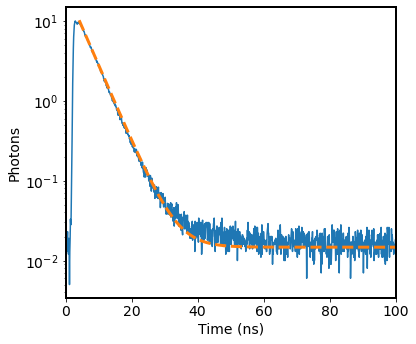

In [37]:
oLT['lifetimes']=oLT.apply(lambda x: monoexp_plot(x['spec'],(10.5,5,0.3),x['temperature'],12,"obs_LT_fit_oPD_2"), axis=1)

In [38]:
oLT=oLT.sort_values(by='temperature',ascending=True)
oLT.reset_index(inplace=True)

In [39]:
def norm(spec2,dfname):
    spec=copy.deepcopy(spec2)
    spec[:,1]=(spec[:,1]-min(spec[:,1]))
    spec[:,1]=spec[:,1]/max(dfname['max'])*1000
    return spec

def locnorm(spec2):
    spec=copy.deepcopy(spec2)
    spec[:,1]=(spec[:,1]-min(spec[:,1]))
    spec[:,1]=spec[:,1]/max(spec[:,1])*1000
    return spec

In [40]:
#pPL['max']=pPL.apply(lambda x: max(x['spec'][:,1]), axis=1)
oPL['spec_norm']=oPL['spec'].copy(deep=True)
oPL['spec_norm']=oPL.apply(lambda x: norm(x['spec_norm'],oPL), axis=1)

In [41]:
oPL=oPL.sort_values(by=['temperature'])

In [44]:
oPL

,CD,amount,temperature,measurement,file_name,spec,max,max_em,FWHM,spec_norm
56,oPD,10,10.0,EM,oPD_10ul_10C_EM450.txt,"[[460.0, -1048152.5], [461.0, -1990465.13], [4...",2.382991e+09,546.0,86.0,"[[460.0, 0.3954327520812763], [461.0, 0.0], [4..."
51,oPD,10,15.0,EM,oPD_10ul_15C_EM450.txt,"[[460.0, 349384.188], [461.0, -1990465.13], [4...",2.195323e+09,541.0,86.0,"[[460.0, 3.57763194432744], [461.0, 2.59573588..."
65,oPD,10,20.0,EM,oPD_10ul_20C_EM450.txt,"[[460.0, 698768.375], [461.0, -519251.75], [46...",2.088810e+09,548.0,88.0,"[[460.0, 6.6116793419496345], [461.0, 6.100548..."
69,oPD,10,25.0,EM,oPD_10ul_25C_EM450.txt,"[[460.0, 0.0], [461.0, -2163548.75], [462.0, -...",2.028460e+09,540.0,89.0,"[[460.0, 2.9256352369124707], [461.0, 2.017722..."
41,oPD,10,30.0,EM,oPD_10ul_30C_EM450.txt,"[[460.0, -611422.313], [461.0, -1125045.38], [...",1.943562e+09,546.0,89.0,"[[460.0, 5.960397072863289], [461.0, 5.7448599..."
34,oPD,10,35.0,EM,oPD_10ul_35C_EM450.txt,"[[460.0, -524076.25], [461.0, 86541.9531], [46...",1.907881e+09,541.0,86.0,"[[460.0, 18.363748123497828], [461.0, 18.61998..."
52,oPD,10,40.0,EM,oPD_10ul_40C_EM450.txt,"[[460.0, -1222844.63], [461.0, -259625.875], [...",1.820759e+09,545.0,87.0,"[[460.0, 7.990629661880574], [461.0, 8.3948354..."
57,oPD,10,45.0,EM,oPD_10ul_45C_EM450.txt,"[[460.0, 2008959.0], [461.0, -778877.625], [46...",1.772109e+09,545.0,88.0,"[[460.0, 17.299738687624423], [461.0, 16.12984..."
15,oPD,10,50.0,EM,oPD_10ul_50C_EM450.txt,"[[460.0, 1135498.63], [461.0, 2682800.75], [46...",1.702097e+09,542.0,89.0,"[[460.0, 14.51488100762116], [461.0, 15.164191..."
2,oPD,10,55.0,EM,oPD_10ul_55C_EM450.txt,"[[460.0, 1572228.75], [461.0, 778877.625], [46...",1.634057e+09,549.0,89.0,"[[460.0, 20.730137822392393], [461.0, 20.39721..."


In [43]:
oPL['max']=oPL.apply(lambda x: np.nanmax(x['spec'][1:,:]), axis=1)

In [45]:
oPL['spec_norm']=oPL['spec'].copy(deep=True)
oPL['spec_norm']=oPL.apply(lambda x: norm(x['spec_norm'],oPL), axis=1)

In [46]:
oPL['spec_locnorm']=oPL['spec'].copy(deep=True)
oPL['spec_locnorm']=oPL.apply(lambda x: locnorm(x['spec_locnorm']), axis=1)

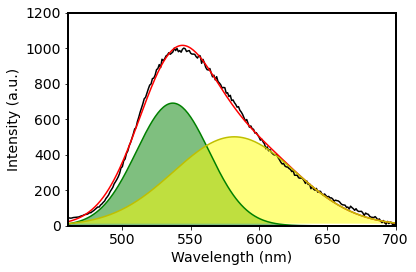

In [48]:
oPL['2fit_locnorm']=oPL.apply(lambda x: _2gauss_plot(x['spec_locnorm'],[33000, 540, 30, 35000, 600, 40],x['temperature'],"png/loc_norm_gauss_2_oPL_1_",460,700), axis=1)

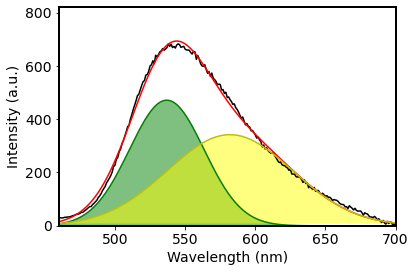

In [50]:
oPL['2fit_norm']=oPL.apply(lambda x: _2gauss_plot(x['spec_norm'],[33000, 540, 30, 35000, 600, 40],x['temperature'],"png/obs_gauss_2_pPL_1_",460,700), axis=1)

In [51]:
oPL_aug=pd.DataFrame(columns=['CD','amount','type','temp1','temp2','temperature','measurement','spec'])
for i in oPL.temperature.values:
    print(i)
    for diff in [5,10]:
        print(diff)
        if len(oPL.loc[oPL['temperature'] == i+diff])>0:
            dat1=oPL.loc[oPL['temperature'] == i+diff]
            dat2=oPL.loc[oPL['temperature'] == i]
            CD=dat1.CD.values[0]
            amount=dat1.amount.values[0]
            measurement=dat1.measurement.values[0]
            spec1=spec=copy.deepcopy(dat1.spec.values[0])
            spec2=spec=copy.deepcopy(dat2.spec.values[0])
            temp1=dat1.temperature.values[0]
            temp2=dat2.temperature.values[0]
            type='aug'
            for int in np.arange(1,abs(diff)):
                spec=spec1+(int/diff)*(spec2-spec1)
                noisel=min(50,min(spec[:,1]))
                spec[:,1]=spec[:,1]+np.random.uniform(-0.5*noisel,0.5*noisel,len(spec[:,1]))
                for l in range(len(spec[:,1])):
                    spec[l,1]=spec[l,1]+np.random.uniform(-0.02*spec[l,1],0.02*spec[l,1])
                temp=temp1+(int/diff)*(temp2-temp1)
                print(temp1,temp2,temp)
                dat=pd.DataFrame([[CD,amount,type,temp1,temp2,temp,measurement,spec]])
                dat.columns=oPL_aug.columns 
                oPL_aug=oPL_aug.append(dat,ignore_index=True)  

10.0
5
15.0 10.0 14.0
15.0 10.0 13.0
15.0 10.0 12.0
15.0 10.0 11.0
10
20.0 10.0 19.0
20.0 10.0 18.0
20.0 10.0 17.0
20.0 10.0 16.0
20.0 10.0 15.0
20.0 10.0 14.0
20.0 10.0 13.0
20.0 10.0 12.0
20.0 10.0 11.0
15.0
5
20.0 15.0 19.0
20.0 15.0 18.0
20.0 15.0 17.0
20.0 15.0 16.0
10
25.0 15.0 24.0
25.0 15.0 23.0
25.0 15.0 22.0
25.0 15.0 21.0
25.0 15.0 20.0
25.0 15.0 19.0
25.0 15.0 18.0
25.0 15.0 17.0
25.0 15.0 16.0
20.0
5
25.0 20.0 24.0
25.0 20.0 23.0
25.0 20.0 22.0
25.0 20.0 21.0
10
30.0 20.0 29.0
30.0 20.0 28.0
30.0 20.0 27.0
30.0 20.0 26.0
30.0 20.0 25.0
30.0 20.0 24.0
30.0 20.0 23.0
30.0 20.0 22.0
30.0 20.0 21.0
25.0
5
30.0 25.0 29.0
30.0 25.0 28.0
30.0 25.0 27.0
30.0 25.0 26.0
10
35.0 25.0 34.0
35.0 25.0 33.0
35.0 25.0 32.0
35.0 25.0 31.0
35.0 25.0 30.0
35.0 25.0 29.0
35.0 25.0 28.0
35.0 25.0 27.0
35.0 25.0 26.0
30.0
5
35.0 30.0 34.0
35.0 30.0 33.0
35.0 30.0 32.0
35.0 30.0 31.0
10
40.0 30.0 39.0
40.0 30.0 38.0
40.0 30.0 37.0
40.0 30.0 36.0
40.0 30.0 35.0
40.0 30.0 34.0
40.0 30.0 33.0
40.0 

In [52]:
oPL_aug['max']=oPL_aug.apply(lambda x: np.nanmax(x['spec'][1:,:]), axis=1)

In [53]:
oPL_aug

,CD,amount,type,temp1,temp2,temperature,measurement,spec,max
0,oPD,10,aug,15.0,10.0,14.0,EM,"[[460.0, 704112.7419493815], [461.0, -2872486....",2.256551e+09
1,oPD,10,aug,15.0,10.0,13.0,EM,"[[460.0, 298125.20894067606], [461.0, -1055411...",2.292530e+09
2,oPD,10,aug,15.0,10.0,12.0,EM,"[[460.0, -846023.7775396897], [461.0, -2054424...",2.328864e+09
3,oPD,10,aug,15.0,10.0,11.0,EM,"[[460.0, -2686.4839142474057], [461.0, -103800...",2.358689e+09
4,oPD,10,aug,20.0,10.0,19.0,EM,"[[460.0, 6951345.125830264], [461.0, 1319375.1...",2.138565e+09
...,...,...,...,...,...,...,...,...,...
116,oPD,10,aug,60.0,50.0,51.0,EM,"[[460.0, 14267663.741824996], [461.0, -2919981...",1.693854e+09
117,oPD,10,aug,60.0,55.0,59.0,EM,"[[460.0, -18239724.68952158], [461.0, -2750676...",1.621006e+09
118,oPD,10,aug,60.0,55.0,58.0,EM,"[[460.0, -24413129.541824903], [461.0, -775905...",1.632144e+09
119,oPD,10,aug,60.0,55.0,57.0,EM,"[[460.0, 4413782.694579586], [461.0, 9512455.9...",1.651148e+09


In [54]:
oPL_aug['spec_norm']=oPL_aug['spec'].copy(deep=True)
oPL_aug['spec_norm']=oPL_aug.apply(lambda x: norm(x['spec_norm'],oPL), axis=1)
oPL_aug['spec_locnorm']=oPL_aug['spec'].copy(deep=True)
oPL_aug['spec_locnorm']=oPL_aug.apply(lambda x: locnorm(x['spec_locnorm']), axis=1)

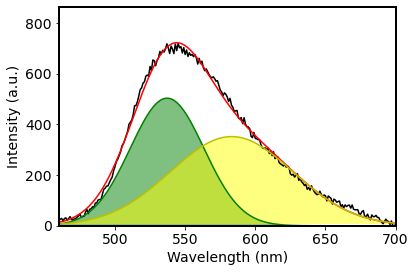

In [55]:
oPL_aug['2fit_norm']=oPL_aug.apply(lambda x: _2gauss_plot(x['spec_norm'],[33000, 540, 30, 35000, 600, 40],x['temperature'],"png/aug_gauss_2_oPL_1_",460,700), axis=1)

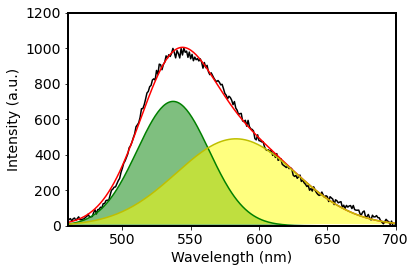

In [56]:
oPL_aug['2fit_locnorm']=oPL_aug.apply(lambda x: _2gauss_plot(x['spec_locnorm'],[33000, 540, 30, 35000, 600, 40],x['temperature'],"png/aug_locnorm?gauss_2_oPL_1_",460,700), axis=1)

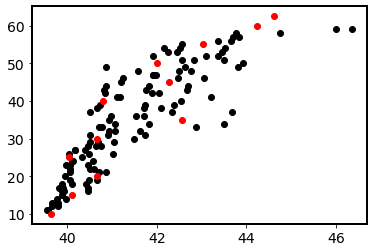

In [57]:
plt.scatter([i[5] for i in oPL_aug['2fit_norm']],oPL_aug['temperature'],color='black')
plt.scatter([i[5] for i in oPL['2fit_norm']],oPL['temperature'],color='red')
#plt.plot(y_array,ln(y_array,*popt_ln))

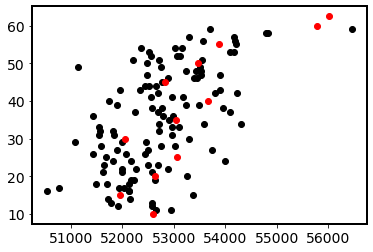

In [58]:
plt.scatter([i[3] for i in oPL_aug['2fit_locnorm']],oPL_aug['temperature'],color='black')
plt.scatter([i[3] for i in oPL['2fit_locnorm']],oPL['temperature'],color='red')
#plt.plot(y_array,ln(y_array,*popt_ln))

In [60]:
oPL_aug

,CD,amount,type,temp1,temp2,temperature,measurement,spec,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm
0,oPD,10,aug,15.0,10.0,14.0,EM,"[[460.0, 704112.7419493815], [461.0, -2872486....",2.256551e+09,"[[460.0, 1.5008868903507437], [461.0, 0.0], [4...","[[460.0, 1.5829698786346231], [461.0, 0.0], [4...","[39974.43883144385, 537.5548298222895, 23.6140...","[42159.11983743795, 537.5549025737552, 23.6138..."
1,oPD,10,aug,15.0,10.0,13.0,EM,"[[460.0, 298125.20894067606], [461.0, -1055411...",2.292530e+09,"[[460.0, 0.5679991287751084], [461.0, 0.0], [4...","[[460.0, 0.5901401958520786], [461.0, 0.0], [4...","[40558.537046098754, 537.5761797658236, 23.495...","[42139.39159546343, 537.576414592498, 23.49522..."
2,oPD,10,aug,15.0,10.0,12.0,EM,"[[460.0, -846023.7775396897], [461.0, -2054424...",2.328864e+09,"[[460.0, 0.5070940449603842], [461.0, 0.0], [4...","[[460.0, 0.5184225090409287], [461.0, 0.0], [4...","[40987.461936391635, 537.5247445787448, 23.550...","[41901.19633401905, 537.5243171215146, 23.5496..."
3,oPD,10,aug,15.0,10.0,11.0,EM,"[[460.0, -2686.4839142474057], [461.0, -103800...",2.358689e+09,"[[460.0, 0.434461796314173], [461.0, 0.0], [46...","[[460.0, 0.4387450930249615], [461.0, 0.0], [4...","[40954.366132260846, 537.2822564361469, 23.292...","[41358.842749946154, 537.2825997864426, 23.292..."
4,oPD,10,aug,20.0,10.0,19.0,EM,"[[460.0, 6951345.125830264], [461.0, 1319375.1...",2.138565e+09,"[[460.0, 9.9819261859946], [461.0, 7.618522222...","[[460.0, 11.035927188651957], [461.0, 8.422969...","[39481.121982848024, 537.7335227912683, 24.095...","[43648.21151633305, 537.7331495916909, 24.0947..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,oPD,10,aug,60.0,50.0,51.0,EM,"[[460.0, 14267663.741824996], [461.0, -2919981...",1.693854e+09,"[[460.0, 24.61591174240074], [461.0, 17.403275...","[[460.0, 33.74637625910771], [461.0, 23.858449...","[33738.42157534341, 537.3984428599338, 25.8609...","[46252.65618240732, 537.3985559581583, 25.8609..."
117,oPD,10,aug,60.0,55.0,59.0,EM,"[[460.0, -18239724.68952158], [461.0, -2750676...",1.621006e+09,"[[460.0, 27.04265759313159], [461.0, 23.153831...","[[460.0, 37.8252362633035], [461.0, 32.3858380...","[34011.33797736892, 538.0280614455432, 27.3980...","[47573.34842432628, 538.0284249779959, 27.3983..."
118,oPD,10,aug,60.0,55.0,58.0,EM,"[[460.0, -24413129.541824903], [461.0, -775905...",1.632144e+09,"[[460.0, 20.3807460885778], [461.0, 27.3694738...","[[460.0, 28.483046501193805], [461.0, 38.25012...","[32740.992861454317, 537.2533575042452, 26.479...","[45755.35458043621, 537.2532753093897, 26.4791..."
119,oPD,10,aug,60.0,55.0,57.0,EM,"[[460.0, 4413782.694579586], [461.0, 9512455.9...",1.651148e+09,"[[460.0, 28.109365651390377], [461.0, 30.24897...","[[460.0, 39.0871385608953], [461.0, 42.0623486...","[33099.44327877478, 537.2369620907914, 26.3252...","[46026.7422703157, 537.2368423839828, 26.32531..."


In [104]:
pmerge=pd.merge(oPL_aug, oLT_aug, how="left", on=["CD","amount","type","temp1", "temp2","temperature",])
#pobsmerge=pd.merge(oPL, oLT, how="left", on=["CD","amount","temp1", "temp2","temperature",])
pobsmerge=pd.merge(oPL, oLT, how="left", on=["CD","amount","temperature",])

10.184682225725158 4.751683258944521 0.017965422499381857
10.184682225725158 4.751683258944521 0.017965422499381857
10.166422462287438 4.759115619906867 0.01905215320771739
10.166422462287438 4.759115619906867 0.01905215320771739
10.159486282707919 4.763973273502856 0.020121070404471485
10.159486282707919 4.763973273502856 0.020121070404471485
10.257987136132323 4.777851104860492 0.02133999350184719
10.257987136132323 4.777851104860492 0.02133999350184719
10.472578417120852 4.679744156687854 0.016088931712107093
10.472578417120852 4.679744156687854 0.016088931712107093
10.454583349009603 4.704254322556402 0.016587500263072624
10.454583349009603 4.704254322556402 0.016587500263072624
10.407786318756493 4.721056736723533 0.017166849434510613
10.407786318756493 4.721056736723533 0.017166849434510613
10.38465410960979 4.715480161608184 0.018019080124621823
10.38465410960979 4.715480161608184 0.018019080124621823
10.356507444715456 4.722825489087892 0.018744589392911258
10.356507444715456 4

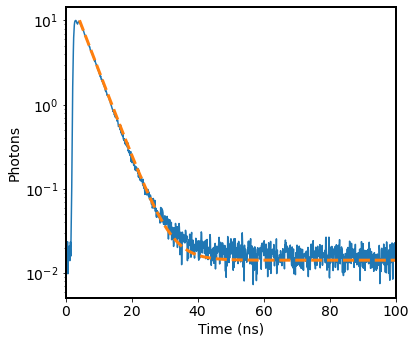

In [106]:
pmerge['lifetimes']=pmerge.apply(lambda x: monoexp_plot(x['spec_y'],(10.5,5,0.3),x['temperature'],12,"aug_LT_fit_oPD"), axis=1)

Text(0.0, 1.0, 'b)')

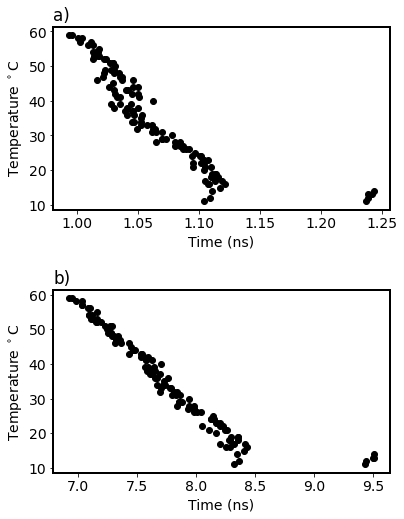

In [52]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False,
                               gridspec_kw={'height_ratios': [1,1]},
                               figsize=(6, 8))
fig.set_tight_layout({'rect': [0, 0, 1, 0.95], 'pad': 1.5, 'h_pad': 1.5})
#plt.setp(axes, title='Test')
#fig.suptitle('An overall title', size=20)

#popt_lin, pcov_lin = scipy.optimize.curve_fit(lin, [item[3] for item in pLT.lifetimes.values][1:], pLT.temperature.values[1:], (-5,10),maxfev=100000)

axes[1].scatter([item[3] for item in pmerge.lifetimes.values],pmerge.temperature.values,color='black')
#axes[1].plot(x_one_lt[1:], lin(x_one_lt[1:], *popt_lin), color='blue')#,\

#popt_lin, pcov_lin = scipy.optimize.curve_fit(lin, [item[1] for item in pLT.lifetimes.values][1:], pLT.temperature.values[1:], (-5,10),maxfev=100000)

axes[0].scatter([item[1] for item in pmerge.lifetimes.values],pmerge.temperature.values,color='black')
#axes[0].plot(x_two_lt[1:], lin(x_two_lt[1:], *popt_lin), color='blue')#,\



#axes[1].set_xlim(4500,9500)
#axes[1].set_ylim(5,65)
#axes[0].set_xlim(5,65)
#axes[0].set_ylim(4500,9500)

axes[0].set_xlabel('Time (ns)')
axes[1].set_xlabel('Time (ns)')
#axes[0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes[0].set_ylabel('Temperature $^\circ$C')
axes[1].set_ylabel('Temperature $^\circ$C')
axes[0].set_title('a)',loc='left')
axes[1].set_title('b)',loc='left')

In [65]:
pmerge

,CD,amount,type,temp1,temp2,temperature,measurement_x,spec_x,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm,measurement_y,spec_y,lifetimes
0,oPD,10,aug,15.0,10.0,14.0,EM,"[[460.0, 704112.7419493815], [461.0, -2872486....",2.256551e+09,"[[460.0, 1.5008868903507437], [461.0, 0.0], [4...","[[460.0, 1.5829698786346231], [461.0, 0.0], [4...","[39974.43883144385, 537.5548298222895, 23.6140...","[42159.11983743795, 537.5549025737552, 23.6138...",LT,"[[0.0, 172.94434909714818], [0.09765625, 306.9...",[4.752]
1,oPD,10,aug,15.0,10.0,13.0,EM,"[[460.0, 298125.20894067606], [461.0, -1055411...",2.292530e+09,"[[460.0, 0.5679991287751084], [461.0, 0.0], [4...","[[460.0, 0.5901401958520786], [461.0, 0.0], [4...","[40558.537046098754, 537.5761797658236, 23.495...","[42139.39159546343, 537.576414592498, 23.49522...",LT,"[[0.0, 168.3542801525898], [0.09765625, 292.37...",[4.759]
2,oPD,10,aug,15.0,10.0,12.0,EM,"[[460.0, -846023.7775396897], [461.0, -2054424...",2.328864e+09,"[[460.0, 0.5070940449603842], [461.0, 0.0], [4...","[[460.0, 0.5184225090409287], [461.0, 0.0], [4...","[40987.461936391635, 537.5247445787448, 23.550...","[41901.19633401905, 537.5243171215146, 23.5496...",LT,"[[0.0, 199.99925817500701], [0.09765625, 237.6...",[4.764]
3,oPD,10,aug,15.0,10.0,11.0,EM,"[[460.0, -2686.4839142474057], [461.0, -103800...",2.358689e+09,"[[460.0, 0.434461796314173], [461.0, 0.0], [46...","[[460.0, 0.4387450930249615], [461.0, 0.0], [4...","[40954.366132260846, 537.2822564361469, 23.292...","[41358.842749946154, 537.2825997864426, 23.292...",LT,"[[0.0, 245.5223796048691], [0.09765625, 246.64...",[4.778]
4,oPD,10,aug,20.0,10.0,19.0,EM,"[[460.0, 6951345.125830264], [461.0, 1319375.1...",2.138565e+09,"[[460.0, 9.9819261859946], [461.0, 7.618522222...","[[460.0, 11.035927188651957], [461.0, 8.422969...","[39481.121982848024, 537.7335227912683, 24.095...","[43648.21151633305, 537.7331495916909, 24.0947...",LT,"[[0.0, 199.503471367384], [0.09765625, 225.242...",[4.68]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,oPD,10,aug,60.0,50.0,51.0,EM,"[[460.0, 14267663.741824996], [461.0, -2919981...",1.693854e+09,"[[460.0, 24.61591174240074], [461.0, 17.403275...","[[460.0, 33.74637625910771], [461.0, 23.858449...","[33738.42157534341, 537.3984428599338, 25.8609...","[46252.65618240732, 537.3985559581583, 25.8609...",LT,"[[0.0, 157.73996212503476], [0.09765625, 141.2...",[4.302]
117,oPD,10,aug,60.0,55.0,59.0,EM,"[[460.0, -18239724.68952158], [461.0, -2750676...",1.621006e+09,"[[460.0, 27.04265759313159], [461.0, 23.153831...","[[460.0, 37.8252362633035], [461.0, 32.3858380...","[34011.33797736892, 538.0280614455432, 27.3980...","[47573.34842432628, 538.0284249779959, 27.3983...",LT,"[[0.0, 148.360254813631], [0.09765625, 207.215...",[4.185]
118,oPD,10,aug,60.0,55.0,58.0,EM,"[[460.0, -24413129.541824903], [461.0, -775905...",1.632144e+09,"[[460.0, 20.3807460885778], [461.0, 27.3694738...","[[460.0, 28.483046501193805], [461.0, 38.25012...","[32740.992861454317, 537.2533575042452, 26.479...","[45755.35458043621, 537.2532753093897, 26.4791...",LT,"[[0.0, 125.26527748275028], [0.09765625, 178.4...",[4.216]
119,oPD,10,aug,60.0,55.0,57.0,EM,"[[460.0, 4413782.694579586], [461.0, 9512455.9...",1.651148e+09,"[[460.0, 28.109365651390377], [461.0, 30.24897...","[[460.0, 39.0871385608953], [461.0, 42.0623486...","[33099.44327877478, 537.2369620907914, 26.3252...","[46026.7422703157, 537.2368423839828, 26.32531...",LT,"[[0.0, 130.80973412404555], [0.09765625, 160.5...",[4.229]


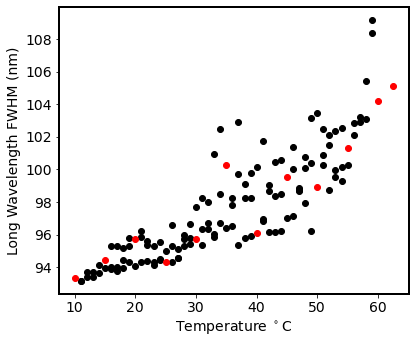

In [107]:
plt.figure(figsize=(6,5))
plt.scatter(pmerge['temperature'],[2.355*i[5] for i in pmerge['2fit_norm']],color='black')
plt.scatter(oPL['temperature'],[2.355*i[5] for i in oPL['2fit_norm']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Long Wavelength FWHM (nm)')
plt.tight_layout()
plt.savefig("o_PD_aug_data_FWHM_long.png",facecolor='white',dpi=300)

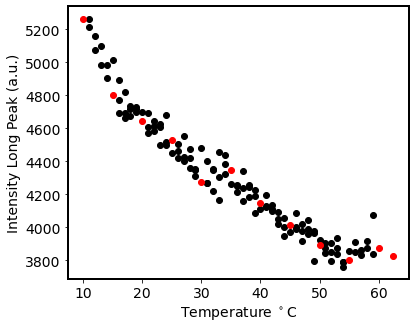

In [108]:
plt.figure(figsize=(6,4.8))
plt.scatter(pmerge['temperature'],[i[3]/10 for i in pmerge['2fit_norm']],color='black')
plt.scatter(oPL['temperature'],[i[3]/10 for i in oPL['2fit_norm']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Intensity Long Peak (a.u.)')
plt.tight_layout()
plt.savefig("oPD_aug_data_peak_long.png",facecolor='white',dpi=300)

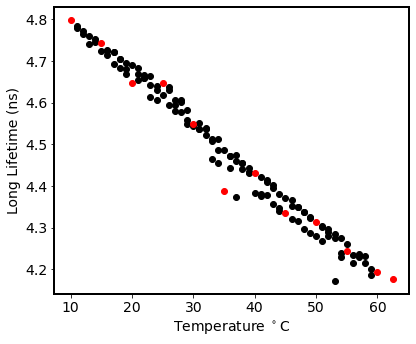

In [69]:
plt.figure(figsize=(6,5))
plt.scatter(pmerge['temperature'],[i[0] for i in pmerge['lifetimes']],color='black')
plt.scatter(oLT['temperature'],[i[0] for i in oLT['lifetimes']],color='red')
plt.xlabel('Temperature $^\circ$C')
plt.ylabel('Long Lifetime (ns)')
plt.tight_layout()
plt.savefig("oPD_aug_data_lt_long.png",facecolor='white',dpi=300)

In [76]:
pmerge

,CD,amount,type,temp1,temp2,temperature,measurement_x,spec_x,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm,measurement_y,spec_y,lifetimes
73,pPD,10,aug,45.0,35.0,40.0,EM,"[[430.0, 1525.0051611381668], [431.0, 1448.935...",5773.578020,"[[430.0, 140.72618520643766], [431.0, 131.0098...","[[430.0, 205.9214555799139], [431.0, 191.70373...","[22757.739529482493, 484.5837517258577, 31.624...","[33300.91484944996, 484.583782726843, 31.62418...",LT,"[[0.0, 52.63367160004962], [0.09765625, 74.971...","[90.3, 1.062, 9.7, 7.705]"
47,pPD,10,aug,35.0,25.0,30.0,EM,"[[430.0, 1572.503123684628], [431.0, 1482.9590...",5182.409805,"[[430.0, 149.14364241578932], [431.0, 137.7061...","[[430.0, 244.40247085875052], [431.0, 225.6598...","[25025.155546756152, 485.3957868421574, 32.933...","[41008.86500839819, 485.39582157834957, 32.933...",LT,"[[0.0, 71.2577408080176], [0.09765625, 72.1889...","[90.3, 1.078, 9.7, 7.939]"
31,pPD,10,aug,30.0,20.0,28.0,EM,"[[430.0, 1622.5186651124334], [431.0, 1543.877...",5126.012296,"[[430.0, 156.88512451550085], [431.0, 146.8403...","[[430.0, 259.5771856448753], [431.0, 242.95736...","[25580.915584481696, 485.19752018257395, 33.22...","[42325.396765880294, 485.19757196313964, 33.22...",LT,"[[0.0, 51.18531407299577], [0.09765625, 73.031...","[90.1, 1.065, 9.9, 7.838]"
115,pPD,10,aug,60.0,50.0,52.0,EM,"[[430.0, 1500.6069935473731], [431.0, 1433.139...",6773.087752,"[[430.0, 128.76005728503264], [431.0, 120.1424...","[[430.0, 160.50562012149177], [431.0, 149.7633...","[20193.332885222735, 483.45442269099016, 30.33...","[25171.864085791847, 483.45429438232935, 30.33...",LT,"[[0.0, 65.31050081216468], [0.09765625, 99.603...","[89.2, 1.013, 10.8, 7.158]"
5,pPD,10,aug,20.0,10.0,18.0,EM,"[[430.0, 1696.284212262266], [431.0, 1596.4995...",4809.582315,"[[430.0, 170.05838279685844], [431.0, 157.3128...","[[430.0, 299.54586760910365], [431.0, 277.0955...","[29254.73889275295, 485.7747454312423, 33.3537...","[51530.16528483163, 485.7747511107933, 33.3537...",LT,"[[0.0, 65.56922432673937], [0.09765625, 108.32...","[89.9, 1.116, 10.1, 8.359]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49,pPD,10,aug,35.0,25.0,28.0,EM,"[[430.0, 1511.6416789588002], [431.0, 1538.612...",5128.390554,"[[430.0, 143.46404305455218], [431.0, 146.9089...","[[430.0, 236.96136043849333], [431.0, 242.6514...","[25484.004360528168, 485.1707862753842, 32.831...","[42092.286230216385, 485.17082153324, 32.83195...",LT,"[[0.0, 72.26599509692981], [0.09765625, 99.257...","[90.3, 1.084, 9.7, 7.984]"
85,pPD,10,aug,50.0,40.0,46.0,EM,"[[430.0, 1499.612099146691], [431.0, 1399.7573...",6128.252591,"[[430.0, 138.10650530800547], [431.0, 125.3520...","[[430.0, 189.36239055760922], [431.0, 171.8743...","[21715.52637376715, 483.37694214246335, 31.060...","[29774.79351321041, 483.37684579488695, 31.060...",LT,"[[0.0, 54.20580047659703], [0.09765625, 93.338...","[89.7, 1.016, 10.3, 7.312]"
59,pPD,10,aug,40.0,30.0,36.0,EM,"[[430.0, 1534.4070399491625], [431.0, 1502.007...",5380.688461,"[[430.0, 145.55539401962977], [431.0, 141.4169...","[[430.0, 228.55815945348698], [431.0, 222.0597...","[24077.964112004505, 484.8461036771885, 32.755...","[37808.374308142535, 484.84609685980007, 32.75...",LT,"[[0.0, 67.50068970847195], [0.09765625, 81.487...","[90.3, 1.053, 9.7, 7.761]"
41,pPD,10,aug,30.0,25.0,27.0,EM,"[[430.0, 1565.3409215830109], [431.0, 1579.899...",4993.854647,"[[430.0, 150.85487119141882], [431.0, 152.7144...","[[430.0, 256.21614217520187], [431.0, 259.3744...","[25857.937568092562, 485.35606805057904, 33.28...","[43917.875578914805, 485.3561204714869, 33.287...",LT,"[[0.0, 86.90639205422407], [0.09765625, 75.794...","[90.2, 1.084, 9.8, 7.934]"


In [97]:
max([i[1] for i in pmerge['lifetimes']])

1.244

In [110]:
print(min([(item[1]*item[0])/(0.01*item[3]*item[2]+0.01*item[1]*item[0]) for item in pmerge['lifetimes']]))
print(min([(item[1]*item[0])/(0.01*item[3]*item[2]+0.01*item[1]*item[0]) for item in pobsmerge['lifetimes']]))

51.26363956353397
51.20224325271643


In [101]:
pmerge

,CD,amount,type,temp1,temp2,temperature,measurement_x,spec_x,max,spec_norm,spec_locnorm,2fit_norm,2fit_locnorm,measurement_y,spec_y,lifetimes
114,oPD,10,aug,60.0,50.0,53.0,EM,"[[460.0, 16157872.889018629], [461.0, 8171322....",1.695394e+09,"[[460.0, 22.919168148992654], [461.0, 19.56768...","[[460.0, 31.499898098177688], [461.0, 26.89365...","[31860.41735107819, 536.6819395175517, 25.4496...","[43787.07743911961, 536.6816520019892, 25.4493...",LT,"[[0.0, 137.21657859570237], [0.09765625, 188.8...",[4.275]
95,oPD,10,aug,55.0,45.0,54.0,EM,"[[460.0, 1968795.6143076553], [461.0, 14181050...",1.656200e+09,"[[460.0, 24.14897376734998], [461.0, 29.273733...","[[460.0, 33.618134146804785], [461.0, 40.75238...","[34876.49435321407, 537.8046054787877, 26.7828...","[48550.60955692658, 537.803974606729, 26.78249...",LT,"[[0.0, 154.57210535641326], [0.09765625, 130.9...",[4.238]
63,oPD,10,aug,40.0,30.0,32.0,EM,"[[460.0, 4841714.046219431], [461.0, -4969436....",1.931875e+09,"[[460.0, 10.36782547829284], [461.0, 6.2506673...","[[460.0, 12.658669313866735], [461.0, 7.631796...","[36810.2485311083, 537.8275307946546, 24.91925...","[44944.57253378611, 537.8277671232242, 24.9194...",LT,"[[0.0, 118.60651652749435], [0.09765625, 181.7...",[4.523]
44,oPD,10,aug,35.0,25.0,33.0,EM,"[[460.0, -16609415.634395156], [461.0, -148672...",1.952016e+09,"[[460.0, 13.5058071536831], [461.0, 14.2368736...","[[460.0, 16.085598291890513], [461.0, 16.95630...","[36865.87378854494, 537.87582144433, 25.136157...","[43905.97403286823, 537.8756000346227, 25.1358...",LT,"[[0.0, 138.41746215139074], [0.09765625, 161.9...",[4.465]
104,oPD,10,aug,55.0,50.0,54.0,EM,"[[460.0, -16308553.420966746], [461.0, -593038...",1.664085e+09,"[[460.0, 9.339309985709601], [461.0, 13.694413...","[[460.0, 13.07109621537352], [461.0, 19.166404...","[32861.93385691955, 536.9190475566228, 25.8409...","[45993.86163531477, 536.9187879087441, 25.8410...",LT,"[[0.0, 109.82918178494684], [0.09765625, 148.5...",[4.229]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,oPD,10,aug,25.0,15.0,19.0,EM,"[[460.0, -962943.412648297], [461.0, -3755272....",2.133486e+09,"[[460.0, 2.6266116433145283], [461.0, 1.454836...","[[460.0, 2.92388794711483], [461.0, 1.61949314...","[38088.48241026847, 537.3978270477038, 23.7588...","[42400.47290555717, 537.3979637019467, 23.7590...",LT,"[[0.0, 139.38110273733463], [0.09765625, 257.4...",[4.695]
19,oPD,10,aug,25.0,15.0,22.0,EM,"[[460.0, 1952246.1866709655], [461.0, -2474604...",2.093364e+09,"[[460.0, 3.637467107083233], [461.0, 1.7797804...","[[460.0, 4.127487147763714], [461.0, 2.0195429...","[37741.789813054485, 537.5199080010688, 23.955...","[42826.40898638729, 537.5202291216846, 23.9558...",LT,"[[0.0, 145.41364817848176], [0.09765625, 262.1...",[4.667]
76,oPD,10,aug,45.0,35.0,37.0,EM,"[[460.0, -14809251.339255545], [461.0, -304791...",1.855740e+09,"[[460.0, 17.93855844239654], [461.0, 22.874092...","[[460.0, 22.34228405699004], [461.0, 28.489439...","[36884.580232275344, 537.9981971083995, 25.799...","[45938.3190285819, 537.9977531403706, 25.79935...",LT,"[[0.0, 163.04479045296364], [0.09765625, 153.1...",[4.373]
58,oPD,10,aug,40.0,30.0,37.0,EM,"[[460.0, -5273773.909218219], [461.0, 7484239....",1.867232e+09,"[[460.0, 4.116477672068305], [461.0, 9.4702597...","[[460.0, 5.21141598656], [461.0, 11.9892459278...","[34314.504488105726, 537.0139050369305, 24.472...","[43441.9657942917, 537.0136230505998, 24.47210...",LT,"[[0.0, 143.97772832537757], [0.09765625, 201.5...",[4.473]


In [102]:
pobsmerge

,CD,amount,temperature,measurement_x,file_name_x,spec_x,max_x,max_em_x,FWHM_x,spec_norm,...,2fit_locnorm,2fit_norm,index,measurement_y,file_name_y,spec_y,max_y,max_em_y,FWHM_y,lifetimes
0,oPD,10,10.0,EM,oPD_10ul_10C_EM450.txt,"[[460.0, -1048152.5], [461.0, -1990465.13], [4...",2.382991e+09,546.0,86.0,"[[460.0, 0.3954327520812763], [461.0, 0.0], [4...",...,"[41876.62931938117, 537.4725310469739, 23.3300...","[41912.71419740687, 537.4723971216603, 23.3301...",17,LT,oPD_10ul_10C_LT450.txt,"[[0.0, 250.0], [0.09765625, 220.0], [0.1953125...",NaN,NaN,NaN,[4.798]
1,oPD,10,15.0,EM,oPD_10ul_15C_EM450.txt,"[[460.0, 349384.188], [461.0, -1990465.13], [4...",2.195323e+09,541.0,86.0,"[[460.0, 3.57763194432744], [461.0, 2.59573588...",...,"[43312.71807517256, 537.7767040018123, 23.8809...","[40050.5302826438, 537.776671991048, 23.880948...",10,LT,oPD_10ul_15C_LT450.txt,"[[0.0, 120.0], [0.09765625, 300.0], [0.1953125...",NaN,NaN,NaN,[4.742]
2,oPD,10,20.0,EM,oPD_10ul_20C_EM450.txt,"[[460.0, 698768.375], [461.0, -519251.75], [46...",2.088810e+09,548.0,88.0,"[[460.0, 6.6116793419496345], [461.0, 6.100548...",...,"[44154.34012750482, 537.764778273658, 24.07520...","[38982.65701556958, 537.7648267089954, 24.0752...",32,LT,oPD_10ul_20C_LT450.txt,"[[0.0, 190.0], [0.09765625, 210.0], [0.1953125...",NaN,NaN,NaN,[4.647]
3,oPD,10,25.0,EM,oPD_10ul_25C_EM450.txt,"[[460.0, 0.0], [461.0, -2163548.75], [462.0, -...",2.028460e+09,540.0,89.0,"[[460.0, 2.9256352369124707], [461.0, 2.017722...",...,"[42491.70832609014, 537.1574483088721, 23.8321...","[36294.142123368605, 537.1574518375262, 23.832...",37,LT,oPD_10ul_25C_LT450.txt,"[[0.0, 140.0], [0.09765625, 230.0], [0.1953125...",NaN,NaN,NaN,[4.648]
4,oPD,10,30.0,EM,oPD_10ul_30C_EM450.txt,"[[460.0, -611422.313], [461.0, -1125045.38], [...",1.943562e+09,546.0,89.0,"[[460.0, 5.960397072863289], [461.0, 5.7448599...",...,"[44733.254388832356, 537.7493342411863, 24.633...","[36761.259430161066, 537.7488978996504, 24.633...",72,LT,oPD_10ul_30C_LT450.txt,"[[0.0, 140.0], [0.09765625, 170.0], [0.1953125...",NaN,NaN,NaN,[4.548]
5,oPD,10,35.0,EM,oPD_10ul_35C_EM450.txt,"[[460.0, -524076.25], [461.0, 86541.9531], [46...",1.907881e+09,541.0,86.0,"[[460.0, 18.363748123497828], [461.0, 18.61998...",...,"[44403.02337417378, 537.7538616704361, 25.2319...","[36374.84916582863, 537.7536194327912, 25.2317...",66,LT,oPD_10ul_35C_LT450.txt,"[[0.0, 170.0], [0.09765625, 140.0], [0.1953125...",NaN,NaN,NaN,[4.387]
6,oPD,10,40.0,EM,oPD_10ul_40C_EM450.txt,"[[460.0, -1222844.63], [461.0, -259625.875], [...",1.820759e+09,545.0,87.0,"[[460.0, 7.990629661880574], [461.0, 8.3948354...",...,"[43450.21270507257, 536.8486781656662, 24.5752...","[33568.80025959484, 536.8488797097825, 24.5753...",9,LT,oPD_10ul_40C_LT450.txt,"[[0.0, 130.0], [0.09765625, 220.0], [0.1953125...",NaN,NaN,NaN,[4.431]
7,oPD,10,45.0,EM,oPD_10ul_45C_EM450.txt,"[[460.0, 2008959.0], [461.0, -778877.625], [46...",1.772109e+09,545.0,88.0,"[[460.0, 17.299738687624423], [461.0, 16.12984...",...,"[45016.84334535185, 537.4115623581015, 25.6012...","[34214.74268368882, 537.4112635193237, 25.6006...",16,LT,oPD_10ul_45C_LT450.txt,"[[0.0, 130.0], [0.09765625, 170.0], [0.1953125...",NaN,NaN,NaN,[4.335]
8,oPD,10,50.0,EM,oPD_10ul_50C_EM450.txt,"[[460.0, 1135498.63], [461.0, 2682800.75], [46...",1.702097e+09,542.0,89.0,"[[460.0, 14.51488100762116], [461.0, 15.164191...",...,"[45785.739788948216, 537.1640583901055, 25.529...","[33346.769083449944, 537.1638177687108, 25.529...",55,LT,oPD_10ul_50C_LT450.txt,"[[0.0, 140.0], [0.09765625, 150.0], [0.1953125...",NaN,NaN,NaN,[4.313]
9,oPD,10,55.0,EM,oPD_10ul_55C_EM450.txt,"[[460.0, 1572228.75], [461.0, 778877.625], [46...",1.634057e+09,549.0,89.0,"[[460.0, 20.730137822392393], [461.0, 20.39721...",...,"[47187.889218511984, 537.2367186259378, 26.184...","[33304.81525360895, 537.2366915917393, 26.1841...",45,LT,oPD_10ul_55C_LT450.txt,"[[0.0, 130.0], [0.09765625, 130.0], [0.1953125...",NaN,NaN,NaN,[4.243]


In [138]:
X_dat_obs

,0,1,2,3,4,5,0
0,41912.714197,537.472397,23.330184,52645.028188,581.597055,39.633026,4.798
1,40050.530283,537.776672,23.880948,48052.998295,582.603502,40.107436,4.742
2,38982.657016,537.764827,24.075250,46474.377380,582.849835,40.656163,4.647
3,36294.142123,537.157452,23.832071,45321.210097,581.586415,40.040608,4.648
4,36761.259430,537.748898,24.633529,42773.281254,582.860390,40.656098,4.548
5,36374.849166,537.753619,25.231760,43456.833072,583.242911,42.570878,4.387
6,33568.800260,536.848880,24.575395,41462.727412,581.442562,40.806238,4.431
7,34214.742684,537.411264,25.600681,40163.031667,582.912057,42.276084,4.335
8,33346.769083,537.163818,25.529188,38941.241693,582.519990,42.008208,4.313
9,33304.815254,537.236692,26.184157,38020.800754,583.034864,43.030358,4.243


In [109]:
pmerge=pmerge.sample(frac=1)

In [126]:
X_dat_aug=pd.concat([pd.DataFrame(pmerge['2fit_norm'].to_list()),pd.DataFrame(pmerge['lifetimes'].to_list())],axis=1,join='inner')

In [127]:
X_dat_obs=pd.concat([pd.DataFrame(pobsmerge['2fit_norm'].to_list()),pd.DataFrame(pobsmerge['lifetimes'].to_list())],axis=1,join='inner')

In [128]:
X_dat_train=np.array(X_dat_aug)
X_dat_test=np.array(X_dat_obs)

In [129]:
Y_dat_train=np.array(pmerge['temperature'])
Y_dat_test=np.array(pobsmerge['temperature'])

In [78]:
import sklearn.model_selection

In [130]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_dat_train, Y_dat_train, test_size=0.33, random_state=42)

In [76]:
from sklearn.linear_model import LinearRegression

In [131]:
reg = LinearRegression().fit(X_train, y_train)

In [132]:
reg.score(X_dat_train, Y_dat_train)

0.9974302712502415

In [134]:
reg.predict(X_dat_test)

array([ 7.99297381, 15.5477172 , 20.58629241, 24.83783672, 30.19587423,
       36.49475929, 40.21143998, 45.55125611, 48.88200667, 54.82179208,
       61.75411378, 63.68671838])

In [119]:
Y_dat_test

array([10. , 15. , 20. , 25. , 30. , 35. , 40. , 45. , 50. , 55. , 60. ,
       62.5])

In [135]:
print(sm.mean_squared_error(y_test,reg.predict(X_test))**0.5)

0.8610225879449327


In [139]:
print(sm.mean_squared_error(Y_dat_test,reg.predict(X_dat_test))**0.5)

1.0442832074980104


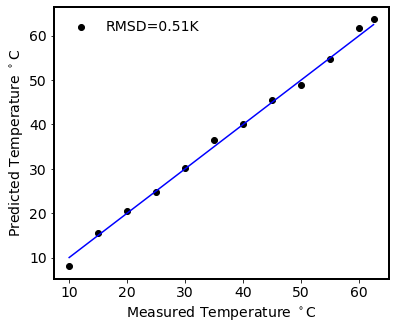

In [137]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(6,5))
plt.scatter(Y_dat_test,reg.predict(X_dat_test),label='RMSD=0.51K',color='black')
plt.plot(Y_dat_test,Y_dat_test,color='blue')
plt.legend(frameon=False)
plt.xlabel('Measured Temperature $^\circ$C')
plt.ylabel('Predicted Temperature $^\circ$C')
plt.savefig("o_PD_predict_reg_comb_2.png",facecolor='white',dpi=300)